# Run the whole deltas algorithm

In [67]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pipeline
# import deltas
import model_deltas

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get data

In [68]:
N1 = 10000
N2 = 10
data_clf = pipeline.get_data(
    m1=[-20, -20],
    m2=[20, 20],
    cov1=[[10, 0], [0, 10]],
    cov2=[[50, 0], [0, 20]],
    N1=N1,
    N2=N2,
    scale=True)


## Get Classifier

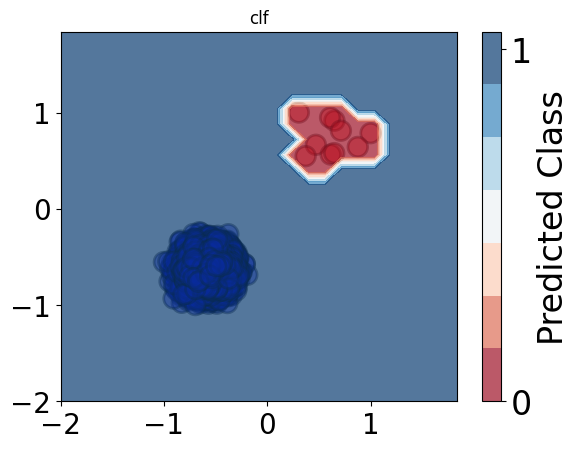

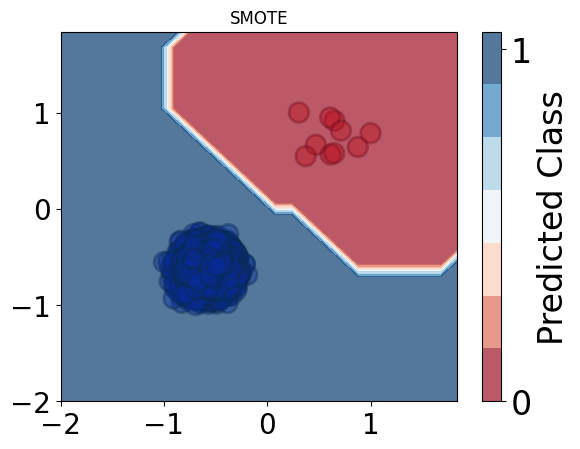

In [69]:
model = 'SVM-linear'
model = 'SVM-rbf'
# model = 'Linear'
# model = 'MLP'

balance_clf = True
# balance_clf = False

data_clf['clf'], clf_SMOTE = pipeline.get_classifier(
                      data_clf=data_clf,
                      model=model,
                      balance_clf=balance_clf)

In [70]:
clf = data_clf['clf']
clf.get_projection([[1, 1]]) #- clf.intercepts_[-1]

array([[0.19387624]])

## Fit deltas

In [71]:
X = data_clf['data']['X']
y = data_clf['data']['y']
deltas_model = model_deltas.base_deltas(clf).fit(X, y, _print=True, _plot=True)

deltas init: [1, 0.06750240486179084]
eq. 7 can be satisfied: True
constraint init: False


## Plot training data information

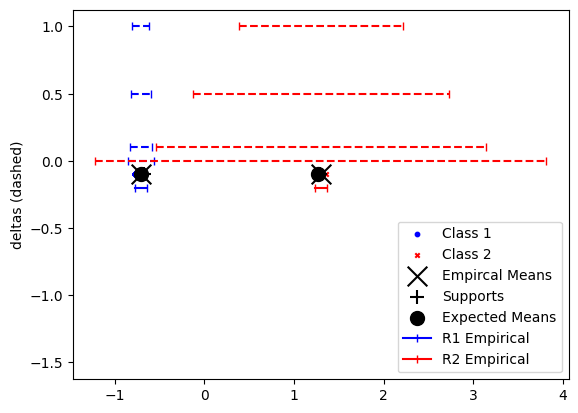

In [72]:
deltas_model.plot_data(data_clf['mean1'], data_clf['mean2'])

## Show parameters

In [73]:
deltas_model.print_params()

Parameters
                R:  1.3590685318566151
                N1: 10000
                N2: 10
                R1: 0.06658772274443381
                R2: 0.0587127218755048
                M:  1.9650387416223278
                D:  2.0099239911190563
                C1: 1
                C2: 1


# Evaluation on test data

original accuracy: 0.96135
deltas accuracy: 1.0
SMOTE accuracy: 1.0

original F1: 0.9597961200395277
deltas F1: 1.0
SMOTE F1: 1.0

original precision0: 0.92824654228163
deltas precision0: 1.0
SMOTE precision0: 1.0

original precision1: 1.0
deltas precision1: 1.0
SMOTE precision1: 1.0



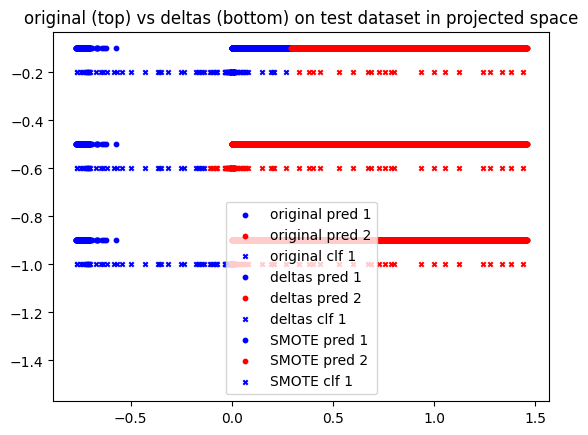

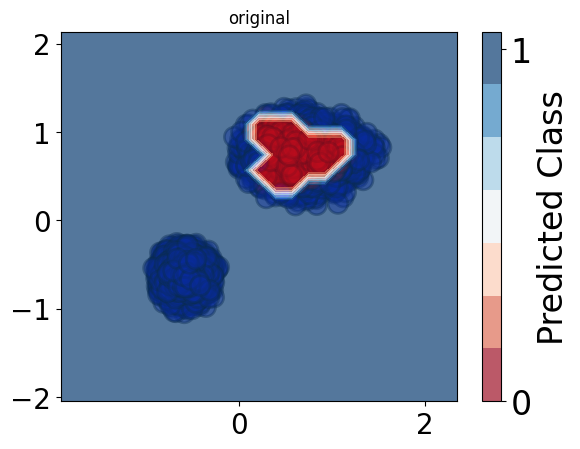

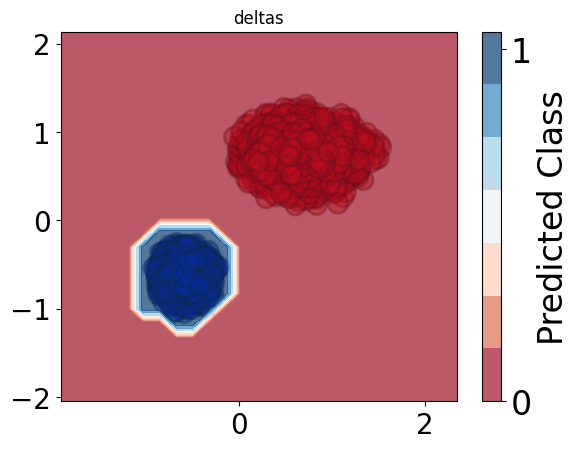

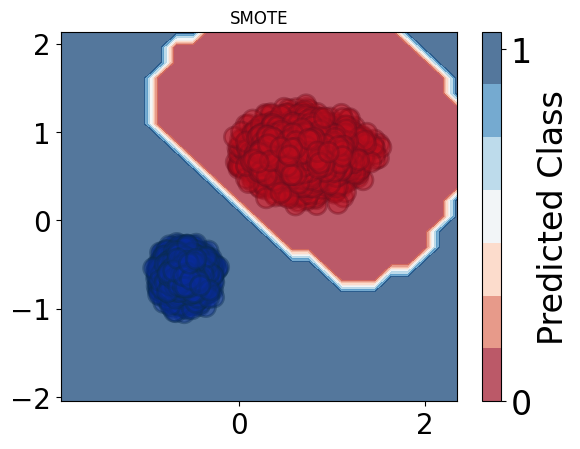

In [75]:
mdels = {
    'original': clf,
    'deltas': deltas_model,
    'SMOTE': clf_SMOTE,
         }
pipeline.eval_test_new(mdels,
                       data_clf['data_test'], _print=True, _plot=True)